In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab as pl
from script.Plot_Induction_Figure import graficaInduccion 

# Proyecto FAA

Jorge Durán, Jaime Enríquez, Marcos de las Heras

## Pre-análisis de datos

**Metadata**:

In [2]:
sensor_m = pd.read_csv("data/HT_Sensor_metadata.dat", sep="\t")
# Correccion: cabecera de metadata mal leido
sensor_m.drop(["dt"], axis=1, inplace=True)
sensor_m.rename(columns={"t0":"dt","class":"t0", "Unnamed: 2":"class"}, inplace=True)

columns_metadata = ["id", "date", "class", "t0", "dt"]
metadata = np.loadtxt('data/HT_Sensor_metadata.dat', skiprows=1, dtype=str)
metadata_aux = np.array( metadata[:,[0,3,4]], dtype=float )

In [3]:
sensor_m.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [4]:
sensor_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   date    100 non-null    object 
 2   class   100 non-null    object 
 3   t0      100 non-null    float64
 4   dt      100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [5]:
sensor_m.describe()

,id,t0,dt
count,100.000000,100.000000,100.000000
mean,49.500000,13.178600,0.751600
std,29.011492,4.799102,0.428424
min,0.000000,5.620000,0.120000
25%,24.750000,8.320000,0.480000
50%,49.500000,13.385000,0.620000
75%,74.250000,16.380000,0.932500
max,99.000000,23.620000,2.310000


**Dataset**:

In [6]:
sensor_d = pd.read_csv("data/HT_Sensor_dataset.dat", sep="  ", engine="python")
# Correccion: datos de dataset mal leidos
sensor_d.dropna(axis=1, inplace=True)
sensor_d.columns=["id","time", "R1","R2","R3","R4","R5","R6","R7","R8", "Temp.", "Humidity"]

columns_dataset = ["id","time", "R1","R2","R3","R4","R5","R6","R7","R8", "Temp.", "Humidity"]
dataset = np.loadtxt('data/HT_Sensor_dataset.dat', skiprows=1)

In [7]:
sensor_d.head()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [8]:
sensor_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928991 entries, 0 to 928990
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        928991 non-null  int64  
 1   time      928991 non-null  float64
 2   R1        928991 non-null  float64
 3   R2        928991 non-null  float64
 4   R3        928991 non-null  float64
 5   R4        928991 non-null  float64
 6   R5        928991 non-null  float64
 7   R6        928991 non-null  float64
 8   R7        928991 non-null  float64
 9   R8        928991 non-null  float64
 10  Temp.     928991 non-null  float64
 11  Humidity  928991 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 85.1 MB


In [9]:
sensor_d.describe()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


* Frecuencia cada clase en experimentos:

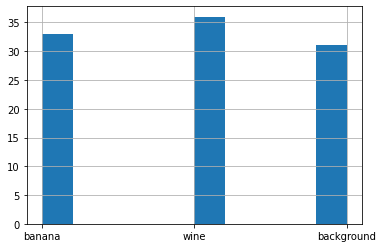

In [10]:
sensor_m["class"].hist()

* Numero de medidas tomadas en sensor_d por experimento

38    15393
32    14148
25    13441
39    13174
57    13140
      ...  
11     6526
20     6174
4      5396
14     4922
76     3825
Name: id, Length: 99, dtype: int64


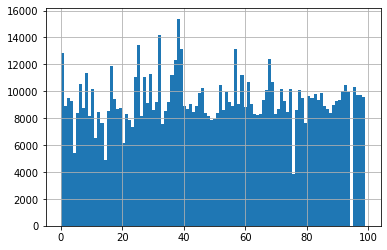

In [11]:
# Frecuencia de datos en sensor_d por experimento
print(sensor_d.id.value_counts())
sensor_d["id"].hist(bins=len(sensor_m))

* Gráficas para sensores, temperatura y humedad para cada experimento:

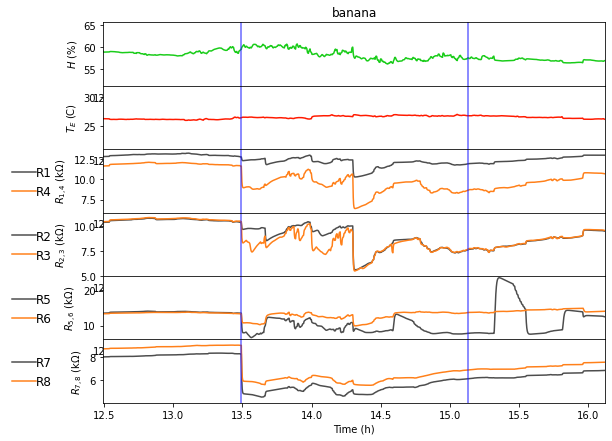

In [12]:
graficaInduccion(id=0, metadata=metadata, dataset=dataset)

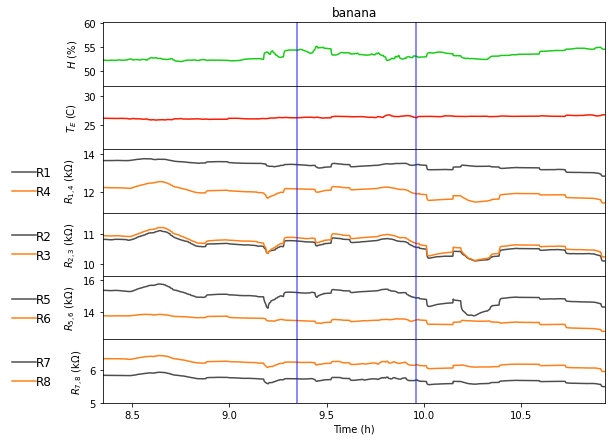

In [13]:
graficaInduccion(id=9, metadata=metadata, dataset=dataset)

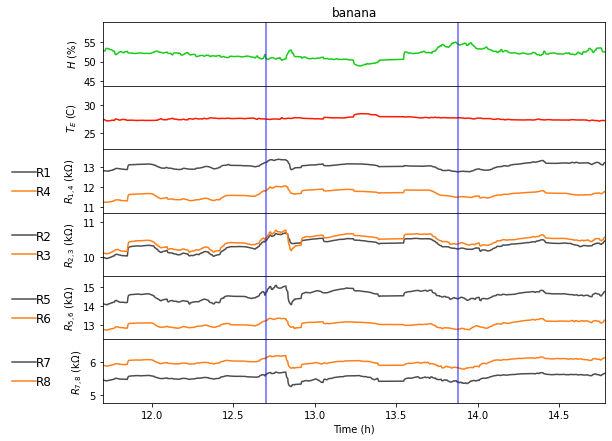

In [14]:
graficaInduccion(id=10, metadata=metadata, dataset=dataset)

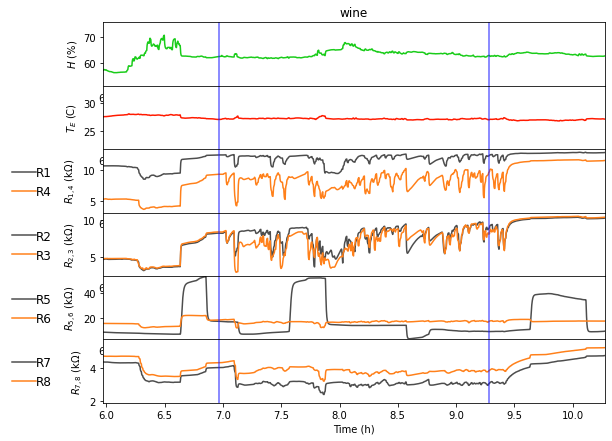

In [15]:
graficaInduccion(metadata=metadata, dataset=dataset)

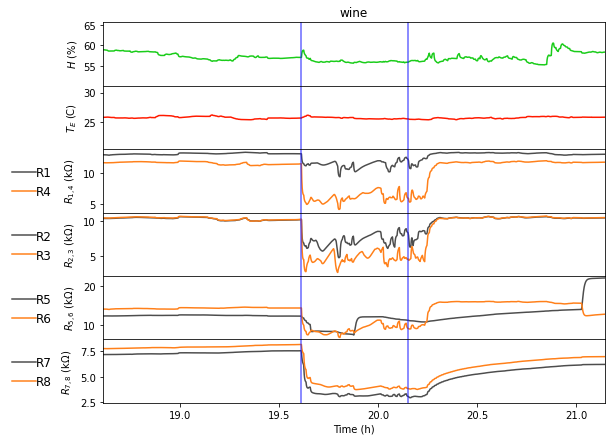

In [16]:
graficaInduccion(id=1, metadata=metadata, dataset=dataset)

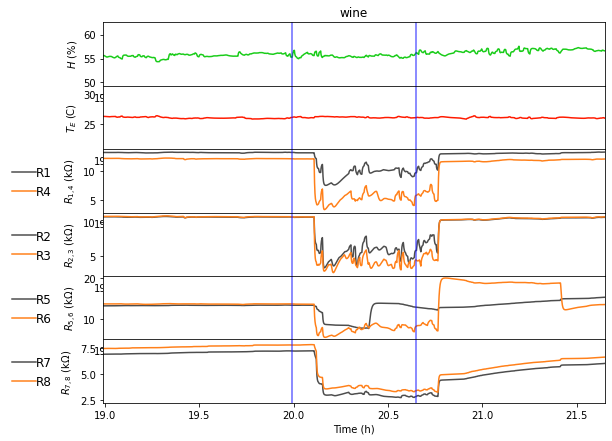

In [17]:
graficaInduccion(id=2, metadata=metadata, dataset=dataset)

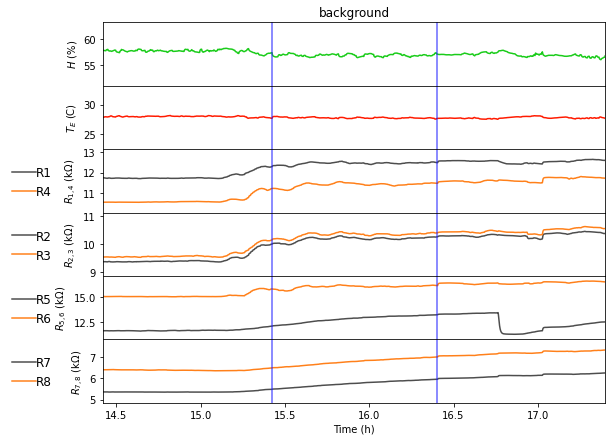

In [18]:
graficaInduccion(id=69, metadata=metadata, dataset=dataset)

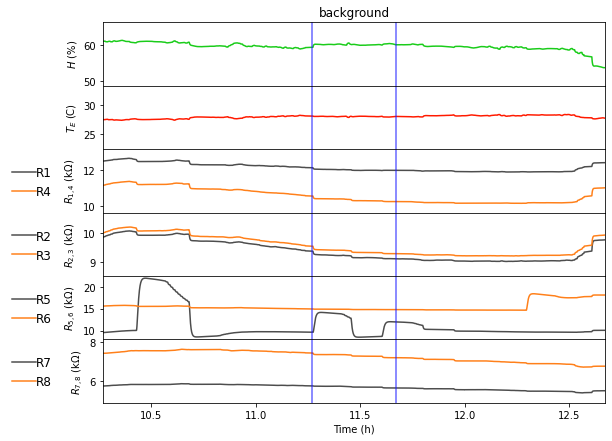

In [19]:
graficaInduccion(id=70, metadata=metadata, dataset=dataset)

* Grafica temperatura vs humedad media

In [20]:
def plotTempHum(poblacion, c):
    plt.scatter(poblacion.groupby("id")["Temp."].mean(), 
                poblacion.groupby("id")["Humidity"].mean(),
                c=c)
    plt.xlabel("Grados ºC")
    plt.ylabel("% Humidity")

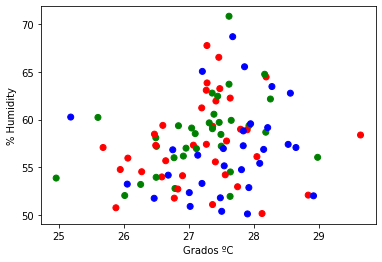

In [21]:
# Lista con colores segun clase    
color = {'wine':'r', 'banana':'g', 'background':'b'}
sensor_m_color = [color[c] for c in sensor_m["class"]]
sensor_m_color.pop(95) # Elimino caso NaN

plotTempHum(sensor_d, sensor_m_color)

Comprobación de ids sin valor en dataset

* Separación de ids de experimentos **por clase**

In [22]:
# Separacion de ids por clase 
dataset_ban = sensor_m[sensor_m["class"] == "banana"].id
dataset_win = sensor_m[sensor_m["class"] == "wine"].id
dataset_bac = sensor_m[sensor_m["class"] == "background"].id


* Funciones que calculan las varianzas y medias de cada sensor.

In [23]:
# Varianza para cada sensor respecto a un mismo experimento de dataset
def varianzas_sensores(dataset=dataset):
    vars_dataset = {}
    for id in dataset.id.unique():
        aux=[]
        for sensor in dataset.columns[2:10]:
            aux.append(dataset[dataset.id==id][sensor].var())
        vars_dataset[id]=aux
    return vars_dataset

# Media para cada sensor respecto a un mismo experimento de dataset
def medias_sensores(dataset=dataset):
    means_dataset = {}
    for id in dataset.id.unique():
        aux=[]
        for sensor in dataset.columns[2:10]:
            aux.append(dataset[dataset.id==id][sensor].mean())
        means_dataset[id]=aux
    return means_dataset

* Medias de las varianzas de los sensores de cada experimento

In [24]:
# Calcula medias de varianzas o medias de sensores de cada experimento de dataset
def mean_varmean_sensores(dataset=dataset, var=True, mean=False, processed_dataset=None):
    if processed_dataset is None:
        if var is True:
            processed_dataset = varianzas_sensores(dataset)
        if mean is False:
            processed_dataset = medias_sensores(dataset)
    mean_proc_dataset = {}
    for id in processed_dataset.keys():
        mean_proc_dataset[id] = np.mean(processed_dataset[id])
    
    return mean_proc_dataset

* Separar entre etapas de experimento

In [25]:
# Dividir dataset en antes, durante y despues de experimentos
def separar_dataset_segun_tiempo(dataset, metadata):
    dataset_antes = pd.DataFrame(columns=dataset.columns)
    dataset_durante = pd.DataFrame(columns=dataset.columns)
    dataset_despues = pd.DataFrame(columns=dataset.columns)
    for id in dataset.id.unique():
        dataset_aux = dataset[dataset.id==id].copy() # Obtengo copia de sub-dataset con id utilizado
        # Obtengo informacion sobre los tiempos
        info_t = metadata[metadata.id == id].values[0]
        t0 = info_t[3] # Empieza simulacion
        tf = t0 + info_t[4] #Finaliza simulacion
        dataset_aux.time += t0
        # Separo los datos y aniado a dataframes auxiliares
        dataset_antes=dataset_antes.append(dataset_aux[dataset_aux.time < t0])
        dataset_durante=dataset_durante.append(dataset_aux[(dataset_aux.time >= t0) & (dataset_aux.time <= tf)])
        dataset_despues=dataset_despues.append(dataset_aux[dataset_aux.time > tf])
        
    return dataset_antes, dataset_durante, dataset_despues

* Ejemplo:

In [26]:
dataset_antes, dataset_durante, dataset_despues = separar_dataset_segun_tiempo(sensor_d, sensor_m)


# Varianzas de cada etapa agrupado por experimento
vars_dataset_antes = varianzas_sensores(dataset_antes)
vars_dataset_durante = varianzas_sensores(dataset_durante)
vars_dataset_despues = varianzas_sensores(dataset_despues)

# Medias de varianzas anteriores
mean_vars_dataset_antes = mean_varmean_sensores(processed_dataset = vars_dataset_antes)
mean_vars_dataset_durante = mean_varmean_sensores(processed_dataset = vars_dataset_durante)
mean_vars_dataset_despues = mean_varmean_sensores(processed_dataset = vars_dataset_despues)

In [27]:
# Medias totales
print("Antes:", np.mean(list(mean_vars_dataset_antes.values())), np.std(list(mean_vars_dataset_antes.values())))
print("Durante:", np.mean(list(mean_vars_dataset_durante.values())), np.std(list(mean_vars_dataset_durante.values())))
print("Despues:", np.mean(list(mean_vars_dataset_despues.values())), np.std(list(mean_vars_dataset_despues.values())))

# Medias totales segun clase
for idx, mean_vars in enumerate([mean_vars_dataset_antes, mean_vars_dataset_durante, mean_vars_dataset_despues]):
    print(["Antes", "Durante", "Despues"][idx])
    print("\tBanana: ", np.mean([mean_vars[i] for i in dataset_ban if i in mean_vars.keys()]), np.std([mean_vars[i] for i in dataset_ban if i in mean_vars.keys()]))
    print("\tWine: ", np.mean([mean_vars[i] for i in dataset_win if i in mean_vars.keys()]), np.std([mean_vars[i] for i in dataset_win if i in mean_vars.keys()]))
    print("\tBackground: ", np.mean([mean_vars[i] for i in dataset_bac if i in mean_vars.keys()]), np.std([mean_vars[i] for i in dataset_bac if i in mean_vars.keys()]))
    print()

Antes: 29.004267135904374 104.69388277660352
Durante: 19.044349068559505 78.91382642533983
Despues: 40.52549013569123 246.4577553097379
Antes
	Banana:  47.273865687380976 94.28789305154986
	Wine:  33.88839311575972 144.98642701900275
	Background:  3.046757553453683 9.828109706277196

Durante
	Banana:  44.83004903905913 128.6829980598931
	Wine:  10.732650203084006 31.29259628366759
	Background:  0.6541177395805133 2.7535335660749594

Despues
	Banana:  13.402271119460451 48.990472683598966
	Wine:  98.8566326761267 400.83872180213507
	Background:  0.9901880191524101 4.208773658205307



In [28]:
diff_id_antes = sensor_m.loc[ sensor_m["id"].isin(dataset_antes["id"]) != True]
print("IDs antes: {}\tIDS después {}\tFilas no presentes:\n{}".format(len(dataset_antes.id.unique()), len(sensor_m["id"]), diff_id_antes))

IDs antes: 99	IDS después 100	Filas no presentes:
    id      date       class     t0    dt
95  95  09-11-15  background  12.55  0.57


In [29]:
diff_id_durante = sensor_m.loc[ sensor_m["id"].isin(dataset_durante["id"]) != True]
print("IDs durante: {}\tIDS después {}\tFilas no presentes:\n{}".format(len(dataset_durante.id.unique()), len(sensor_m["id"]), diff_id_durante))

IDs durante: 99	IDS después 100	Filas no presentes:
    id      date       class     t0    dt
95  95  09-11-15  background  12.55  0.57


In [30]:
diff_id_despues = sensor_m.loc[ sensor_m["id"].isin(dataset_despues["id"]) != True]
print("IDs despues: {}\tIDS después {}\tFilas no presentes:\n{}".format(len(dataset_despues.id.unique()), len(sensor_m["id"]), diff_id_despues))

IDs despues: 97	IDS después 100	Filas no presentes:
    id      date       class     t0    dt
14  14  07-21-15        wine  23.62  0.38
76  76  08-12-15  background  13.67  0.30
95  95  09-11-15  background  12.55  0.57


In [31]:
dataset_antes

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,12.490250,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,12.490528,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,12.490806,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,12.491084,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,12.491373,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736
...,...,...,...,...,...,...,...,...,...,...,...,...
923001,99,11.928821,12.5827,10.1453,10.3258,11.6606,12.0688,17.2313,6.16571,7.18081,27.4111,55.6057
923002,99,11.929099,12.5830,10.1450,10.3257,11.6609,12.0689,17.2311,6.16568,7.18095,27.4110,55.6058
923003,99,11.929377,12.5832,10.1449,10.3258,11.6608,12.0690,17.2310,6.16566,7.18095,27.4109,55.6059
923004,99,11.929655,12.5832,10.1447,10.3259,11.6609,12.0692,17.2311,6.16598,7.18134,27.4108,55.6060


In [32]:
# metadata_aux = list(sensor_m.loc[sensor_m["id"]!= 95 ]["class"])
# metadata_aux
metadata_aux = np.array( metadata[:,[0,2]] )
metadata_aux = np.delete(metadata_aux, 95, 0)

In [33]:
data_antes = np.column_stack((np.array(list(vars_dataset_antes.values())), metadata_aux))
data_durante = np.column_stack((np.array(list(vars_dataset_durante.values())), metadata_aux))
data_antes_durante = np.column_stack((np.array(list(vars_dataset_antes.values())), np.array(list(vars_dataset_durante.values()))))

In [34]:
# vars_dataset_antes 
# vars_dataset_durante 
# vars_dataset_despues 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

In [37]:
X_durante = np.array(list(vars_dataset_antes.values()))
y = metadata_aux[:, 1]
X_durante, y

(array([[1.12006038e-02, 9.70909559e-03, 1.00880107e-02, 1.24679041e-02,
         2.03738448e-02, 1.13938681e-02, 1.09909258e-02, 9.69908729e-03],
        [1.32315956e-02, 3.68700043e-02, 4.13395147e-02, 4.69105474e-02,
         8.60758856e-03, 2.12123464e-02, 1.45750311e-02, 1.48241359e-02],
        [1.37263856e-03, 1.29324578e-03, 1.83678181e-03, 1.92424737e-03,
         2.60190964e-03, 1.63534675e-03, 1.01704374e-02, 1.20921677e-02],
        [1.06105873e+00, 2.88946457e+00, 2.79262823e+00, 3.46511340e+00,
         1.14915358e+03, 2.35115098e+00, 4.80057597e+01, 1.98158667e+01],
        [8.92956596e-02, 9.19807622e-02, 1.54907359e-01, 1.81708985e-01,
         7.47223916e-01, 2.64636132e-01, 1.59834634e-01, 1.60540810e-01],
        [3.21963004e-04, 2.04930178e-03, 1.93166765e-03, 3.63404375e-03,
         6.47150654e-03, 1.10568690e-03, 3.98702017e-04, 6.83278353e-04],
        [5.18255036e-02, 2.21007796e-01, 2.34666564e-01, 2.64089071e-01,
         5.66097344e-01, 1.07582859e-01, 4.25

In [39]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores_durante = cross_val_score(clf, X_durante, y, cv=5)
scores_durante

array([0.3       , 0.35      , 0.5       , 0.35      , 0.47368421])

In [40]:
X_antes_durante = data_antes_durante
X_antes_durante, y

(array([[1.12006038e-02, 9.70909559e-03, 1.00880107e-02, ...,
         1.43909523e+00, 2.04939442e-01, 1.40741086e-01],
        [1.32315956e-02, 3.68700043e-02, 4.13395147e-02, ...,
         1.27588168e+00, 3.83476211e-01, 4.55895270e-01],
        [1.37263856e-03, 1.29324578e-03, 1.83678181e-03, ...,
         6.30686823e+00, 2.79141965e+00, 2.76037719e+00],
        ...,
        [1.61703223e-03, 9.71739114e-03, 9.84084979e-03, ...,
         4.37103522e-04, 5.72681478e-04, 2.74212538e-03],
        [5.36670219e-03, 5.24814615e-02, 5.44776455e-02, ...,
         2.73771955e-03, 1.83759793e-03, 4.76422503e-03],
        [2.11276723e-03, 1.48410501e-03, 1.71593701e-03, ...,
         3.04239503e-04, 1.08292505e-04, 1.81800720e-04]]),
 array(['banana', 'wine', 'wine', 'banana', 'wine', 'banana', 'wine',
        'banana', 'wine', 'banana', 'banana', 'banana', 'wine', 'banana',
        'wine', 'banana', 'banana', 'banana', 'banana', 'wine', 'wine',
        'banana', 'banana', 'wine', 'wine', 'wine

In [41]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores_antes_durante = cross_val_score(clf, X_antes_durante, y, cv=5)
scores_antes_durante

array([0.6       , 0.45      , 0.55      , 0.75      , 0.84210526])

In [68]:
antes_aux = np.delete(data_antes, [14, 76], 0)
antes_aux = antes_aux[:,:-2]
durante_aux = np.delete(data_durante, [14, 76], 0)
durante_aux = durante_aux[:,:-2]
metadata_aux_despues = np.array( metadata[:,[0,2]] )
metadata_aux_despues = np.delete(metadata_aux_despues, [14, 76, 95], 0)
antes_aux[0], durante_aux[0]

(array(['0.011200603793033741', '0.009709095592618453',
        '0.010088010651049984', '0.012467904116816447',
        '0.020373844793287944', '0.011393868064507788',
        '0.010990925824244647', '0.00969908728867779'], dtype='<U32'),
 array(['0.33851910933227186', '1.530385793487321', '1.0131942640084894',
        '1.0877101266337985', '2.9571386935085187', '1.4390952253841822',
        '0.2049394417676952', '0.14074108603294333'], dtype='<U32'))

In [69]:
data_despues = np.column_stack((np.array(list(vars_dataset_despues.values())), metadata_aux_despues))
data = np.column_stack((antes_aux[:,:-2], durante_aux))
print(data[0])
data = np.column_stack((data, np.array(list(vars_dataset_despues.values())) ))

['0.011200603793033741' '0.009709095592618453' '0.010088010651049984'
 '0.012467904116816447' '0.020373844793287944' '0.011393868064507788'
 '0.33851910933227186' '1.530385793487321' '1.0131942640084894'
 '1.0877101266337985' '2.9571386935085187' '1.4390952253841822'
 '0.2049394417676952' '0.14074108603294333']


In [58]:
data[0]

array(['0.011200603793033741', '0.009709095592618453',
       '0.010088010651049984', '0.012467904116816447',
       '0.020373844793287944', '0.011393868064507788',
       '0.010990925824244647', '0.00969908728867779', '0', 'banana',
       '0.33851910933227186', '1.530385793487321', '1.0131942640084894',
       '1.0877101266337985', '2.9571386935085187', '1.4390952253841822',
       '0.2049394417676952', '0.14074108603294333', '0.12476655495365786',
       '0.4125865780289506', '0.4315800258642593', '0.5155965059016128',
       '25.978904248783984', '0.1442510985930608', '0.051295495705032466',
       '0.045014093784500234'], dtype='<U32')

In [70]:
X_all = data
y_all = metadata_aux_despues[:, 1]
X_all, y_all

(array([['0.011200603793033741', '0.009709095592618453',
         '0.010088010651049984', ..., '0.1442510985930608',
         '0.051295495705032466', '0.045014093784500234'],
        ['0.013231595579520347', '0.0368700043417726',
         '0.04133951474105973', ..., '4.005969587401588',
         '0.8930689398922049', '0.9081756712271207'],
        ['0.0013726385613473612', '0.0012932457794966774',
         '0.0018367818052566318', ..., '14.215417291027435',
         '0.7919258175474091', '0.872933401963726'],
        ...,
        ['0.001617032231540143', '0.009717391140495262',
         '0.009840849791649054', ..., '0.0027446144168187508',
         '0.0006395863294124248', '0.0013881753685813316'],
        ['0.005366702190388749', '0.052481461513697425',
         '0.054477645520163126', ..., '0.0023174934570030056',
         '0.00595472635196237', '0.009109427312219231'],
        ['0.00211276722645457', '0.0014841050091941434',
         '0.0017159370112669876', ..., '0.0010528669130926

In [71]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores_antes_durante_despues = cross_val_score(clf, X_all, y_all, cv=5)
scores_antes_durante_despues

array([0.65      , 0.4       , 0.52631579, 0.68421053, 0.78947368])